# Лабораторная работа No2. Ряд Фурье. 
# Преобразование Фурье. Корреляция

## Цель:
Получить представление о спектрах телекоммуникационных
сигналов

## Постановка задачи:
- Для сигналов, построенных в лабораторной работе No1, выполните расчет преобразования Фурье, получите спектры.
- С помощью функции корреляции найдите позицию синхропосылки [101] в сигнале [0001010111000010]. Получите пакет
данных, если известно, что его длина составляет 8 бит без
учета синхропосылки. Вычислите корреляцию прямым методом, воспользуйтесь алгоритмом быстрой корреляции, сравните время работы обоих алгоритмов.
- Теоретические положения к лабораторной работе: Справочные материалы: А.Б.Сергиенко Цифровая обработка сигналов. Глава 1,  сс.25–55, Глава 5, сс. 284–285.

## Основная часть

### Преобразования Фурье



In [19]:
import numpy as np

%autocall 1

%matplotlib inline

# rectangular impulse
def rect_impls_1(t, width): 
	sig = np.zeros(len(t))
	for i in sig:
		if -width/2 <= i < width / 2:
			i = 1
	for i in range(len(sig)):
		if -width/2 <= t[i] < width / 2:
			sig[i] = 1
	return sig

def elem_multiple(a, b):
	if a.shape != b.shape:
		raise IOError("Shapes of matrices are not the same")
		return
	else:
		res = np.zeros(a.shape)
		for i in range(a.shape[0]):
			for j in range(a.shape[1]):
				res[(i,j)] = a[(i,j)] * b[(i,j)]
		# print(res.shape)
		return res

Automatic calling is: Smart


In [22]:
 
%%writefile source01.py
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftfreq

%matplotlib inline

Fs = 8000 # discrete frequency 
t = np.matrix(np.arange(0.0, 1.0, (1 / Fs))).transpose()
A = 2 # amplitude
f0 = 1000
phi =  np.pi /4 
s1 = A * np.cos(2 *  f0 * t + phi) # harmonic signal
fig = plt.figure(figsize=(6,6))
plt.title('Гармонический сигнал')
plt.plot(t[1:100],s1[1:100])
fig.savefig('pictures/001_1harmonic.png', dpi=200)
plt.show()
N = len(t)
T = 1.0 / Fs
yf = fft(s1)
xf = fftfreq(N, 1.0 / Fs)
fig = plt.figure()
plt.title('Амплитудный спектр')
plt.ylim(0, 50)
plt.xlim(-500,500)
plt.plot(xf, np.abs(yf))
fig.savefig('pictures/001_2harmspectr.png', dpi=70)
plt.show()


Overwriting source01.py


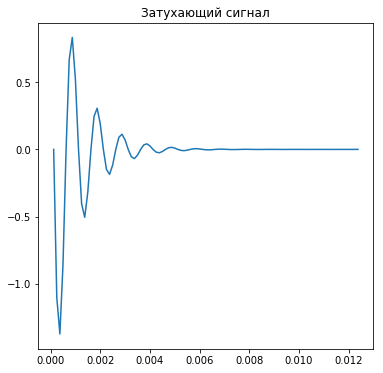

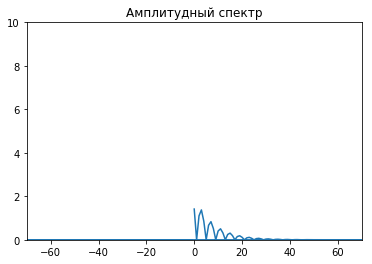

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftfreq

# %who
Fs = 8000 # discrete frequency 
t = np.matrix(np.arange(0.0, 1.0, (1 / Fs))).transpose()
f0 = 1000

phi =  np.pi /4 
alpha = 1000

s2 = elem_multiple(s1, np.exp(-alpha * t))

fig = plt.figure(figsize=(6,6))
plt.title('Затухающий сигнал')
plt.plot(t[1:100],s2[1:100])
fig.savefig('pictures/002_1fadeharm.png', dpi=100)
plt.show()

N = len(t)
T = 1.0 / Fs
yf = fft(s2)
xf = fftfreq(N, 1.0 / Fs)
fig = plt.figure()
plt.title('Амплитудный спектр')
plt.ylim(0, 10)
plt.xlim(-70, 70)
plt.plot(xf, np.abs(yf)) 
fig.savefig('pictures/002_2fadeharmspectr.png', dpi=70)
plt.show()

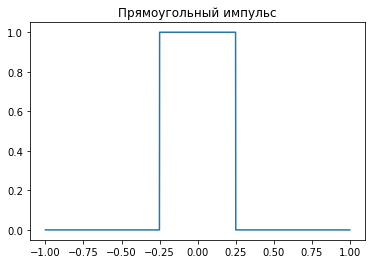

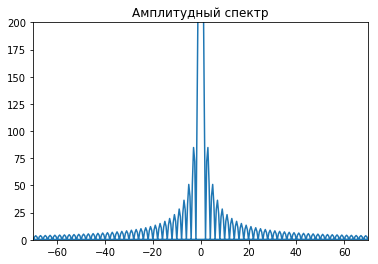

In [18]:
# %%writefile source02.py

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq


# rectangular impulse
def rect_impls_1(t, width): 
	sig = np.zeros(len(t))
	for i in sig:
		if -width/2 <= i < width / 2:
			i = 1
	for i in range(len(sig)):
		if -width/2 <= t[i] < width / 2:
			sig[i] = 1
	return sig

Fs = 800 
t = np.linspace(-1, 1, 2 * Fs)
witdh = 0.5 
fig = plt.figure()
y = rect_impls_1(t, witdh)
plt.plot(t,y)
plt.title('Прямоугольный импульс')
fig.savefig('pictures/002_1rectImpl.png', dpi=100)
plt.show()
N = len(t)
T = 1.0 / Fs
yf = fft(y)
xf = fftfreq(N, 1.0 / Fs)
fig = plt.figure()
plt.title('Амплитудный спектр')
plt.ylim(0, 200)
plt.xlim(-70, 70)
plt.plot(xf, np.abs(yf)) 
fig.savefig('pictures/002_2rectImplSpectr.png', dpi=100)
plt.show()

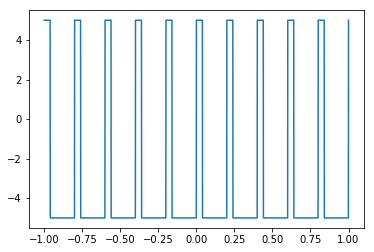

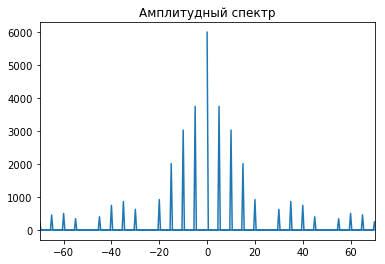

In [15]:
# %%writefile source03.py


import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftfreq

Fs = 1000 # discrete frequency
t = np.linspace(-1, 1, 2 * Fs)
A = 5         
fig = plt.figure()
y = A * signal.square( 2 * np.pi * 5 * t, 0.2)
plt.plot(t, y)
fig.savefig('pictures/003_1rectImplses.png', dpi=100)
plt.show()
N = len(t)
T = 1.0 / Fs
yf = fft(y)
xf = fftfreq(N, 1.0 / Fs)
fig = plt.figure()
plt.title('Амплитудный спектр')
# plt.ylim(0, 200)
plt.xlim(-70, 70)
plt.plot(xf, np.abs(yf)) 
fig.savefig('pictures/003_2rectImplSpectr.png', dpi=100)
plt.show()

In [2]:
%%writefile source04.py


import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Fs = 8000 # discrete frequency 
t = np.linspace(0, 0.5, Fs)
fig = plt.figure()
plt.title('Последовательность треугольных импульсов')
y = signal.sawtooth(2 * np.pi * 8  * t)
plt.plot(t, y)
fig.savefig('pictures/004_1sawtooth.png', dpi=100)
plt.show()
N = len(t)
T = 1.0 / Fs
yf = fft(y)
xf = fftfreq(N, 1.0 / Fs)
fig = plt.figure()
plt.title('Амплитудный спектр')
# plt.ylim(0, 200)
# plt.xlim(-70, 70)
plt.xlim(-10, 10)
plt.plot(xf, np.abs(yf)) 
fig.savefig('pictures/004_2sawToothSpectr.png', dpi=100)
plt.show()

Writing source04.py


In [3]:
%%writefile source05.py

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import special

Fs = 8000
t = np.linspace(-8*np.pi, 8*np.pi, Fs)
# fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
y1 = special.diric(t, 7)
plt.plot(t,y1)
plt.title('Функции Дирихле, n={}, n={}'.format(7,8))
plt.subplot(2, 1, 2)
y2 = special.diric(t, 8)
plt.plot(t, y2)
# plt.title('Функция Дирихле, n={}'.format(8))
fig.savefig('pictures/005_1dirichle.png', dpi = 200)
plt.show()

N = len(t)
T = 1.0 / Fs
yf1 = fft(y1)
yf2 = fft(y2)
xf = fftfreq(N, 1.0 / Fs)


fig = plt.figure()
plt.subplot(2, 1, 1)
plt.xlim(-100,100)
plt.plot(xf, np.abs(yf1))
plt.title('Спектры Функции Дирихле, n={}, n={}'.format(7,8))
plt.subplot(2, 1, 2)
plt.plot(xf, np.abs(yf2))
plt.xlim(-100,100)
# plt.title('Функция Дирихле, n={}'.format(8))
fig.savefig('pictures/005_2dirichleSpectr.png', dpi = 200)
plt.show()

Writing source05.py


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft, fftfreq, ifft


sig = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])
parcel = np.array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
sigF = fft(sig)
parcelF = fft(parcel)
corr_fast = ifft(sigF * parcelF.conjugate()) #/ len(sig)
corr_fast = corr_fast.real

print('Fast correlation')
print(len(corr_fast))
for i in corr_fast: 
    print('{0:2.4f}'.format(i), end=' ')

    
corr = signal.correlate(sig, parcel, mode='same') / len(sig)    
print('\nUsual corrrelation')
print(len(corr))
for i in corr: print('{0:2.4f}'.format(i), end=' ')

Fast correlation
16
0.0000 1.0000 -0.0000 2.0000 0.0000 2.0000 1.0000 2.0000 1.0000 1.0000 0.0000 0.0000 1.0000 0.0000 1.0000 0.0000 
Usual corrrelation
16
0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0625 0.0000 0.1250 0.0000 0.1250 0.0625 0.1250 

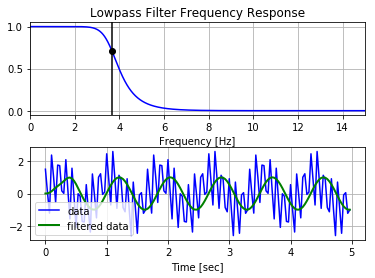

In [5]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()